<h1><center> COSC 4337 Data Science II Second Milestone</center></h1>

## Data Loading & Pre-processing

In [2]:
import pandas as pd

data = pd.read_csv('SoilOrganicCarbonRecovery_NorthwestTerritories.csv')
print(data.head())

print("Null values found in columns:")
data.isnull().sum()

# 2. Drop rows with missing data
data.dropna(inplace=True)
data.isnull().sum()

     plot burn   site        date  decid_prop_canopy  piba_prop_canopy  \
0  C1-14A   C1  C1-14  2018-06-13           0.032258          0.709677   
1  C1-17A   C1  C1-17  2018-06-10           0.000000          0.000000   
2  C1-19A   C1  C1-19  2018-06-13           0.000000          0.000000   
3  C1-19B   C1  C1-19  2018-06-13           0.000000          0.650000   
4  C1-21A   C1  C1-21  2018-06-14           0.023529          0.000000   

  stand_dominance  time_after_fire moisture nonvascular_functionalgroup  \
0       Jack Pine               83    Xeric                      Lichen   
1    Black Spruce               65    Mesic                      Lichen   
2    Black Spruce               82   Hydric                    Sphagnum   
3       Jack Pine               84    Xeric                      Lichen   
4    Black Spruce               79   Hydric                  Colonizers   

   avg_org_carbon ecozone  avg_carbon_stock   latitude  longitude   
0            4.05  shield          

plot                           0
burn                           0
site                           0
date                           0
decid_prop_canopy              0
piba_prop_canopy               0
stand_dominance                0
time_after_fire                0
moisture                       0
nonvascular_functionalgroup    0
avg_org_carbon                 0
ecozone                        0
avg_carbon_stock               0
latitude                       0
longitude                      0
dtype: int64

### Linear Model - Radhika Sonde

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
# correlation matrix
column_indices = [4, 5, 7, 10, 12]
subset_data = data.iloc[:, column_indices]
correlation_matrix = subset_data.corr()

# Formatting
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df = correlation_df.round(4)

# Print the correlation matrix with nicer formatting
print("Correlation Matrix:")
print(correlation_df.to_string())

Correlation Matrix:
                   decid_prop_canopy  piba_prop_canopy  time_after_fire  avg_org_carbon  avg_carbon_stock
decid_prop_canopy             1.0000           -0.0695           0.0394         -0.2634           -0.2826
piba_prop_canopy             -0.0695            1.0000           0.1470         -0.3906           -0.3781
time_after_fire               0.0394            0.1470           1.0000          0.1162            0.0335
avg_org_carbon               -0.2634           -0.3906           0.1162          1.0000            0.8105
avg_carbon_stock             -0.2826           -0.3781           0.0335          0.8105            1.0000


From the correlation matrix, we can see that the strongest relationship is between avg_org_carbon and avg_carbon_stock

Summary of Data:
       decid_prop_canopy  piba_prop_canopy  time_after_fire  avg_org_carbon  \
count         372.000000        372.000000       372.000000      372.000000   
mean            0.105676          0.198727        36.107527       15.807534   
std             0.199444          0.313669        29.462283       15.380294   
min             0.000000          0.000000         1.000000        0.450000   
25%             0.000000          0.000000         1.000000        4.737500   
50%             0.000000          0.005284        42.000000       10.900000   
75%             0.116912          0.337155        46.000000       23.250000   
max             0.988764          1.000000       100.000000       96.000000   

       avg_carbon_stock    latitude  longitude   
count        372.000000  372.000000  372.000000  
mean           7.719661   62.392718 -116.546020  
std            7.291088    1.281536    2.883050  
min            0.324503   60.580573 -128.243545  
25%            2.5241

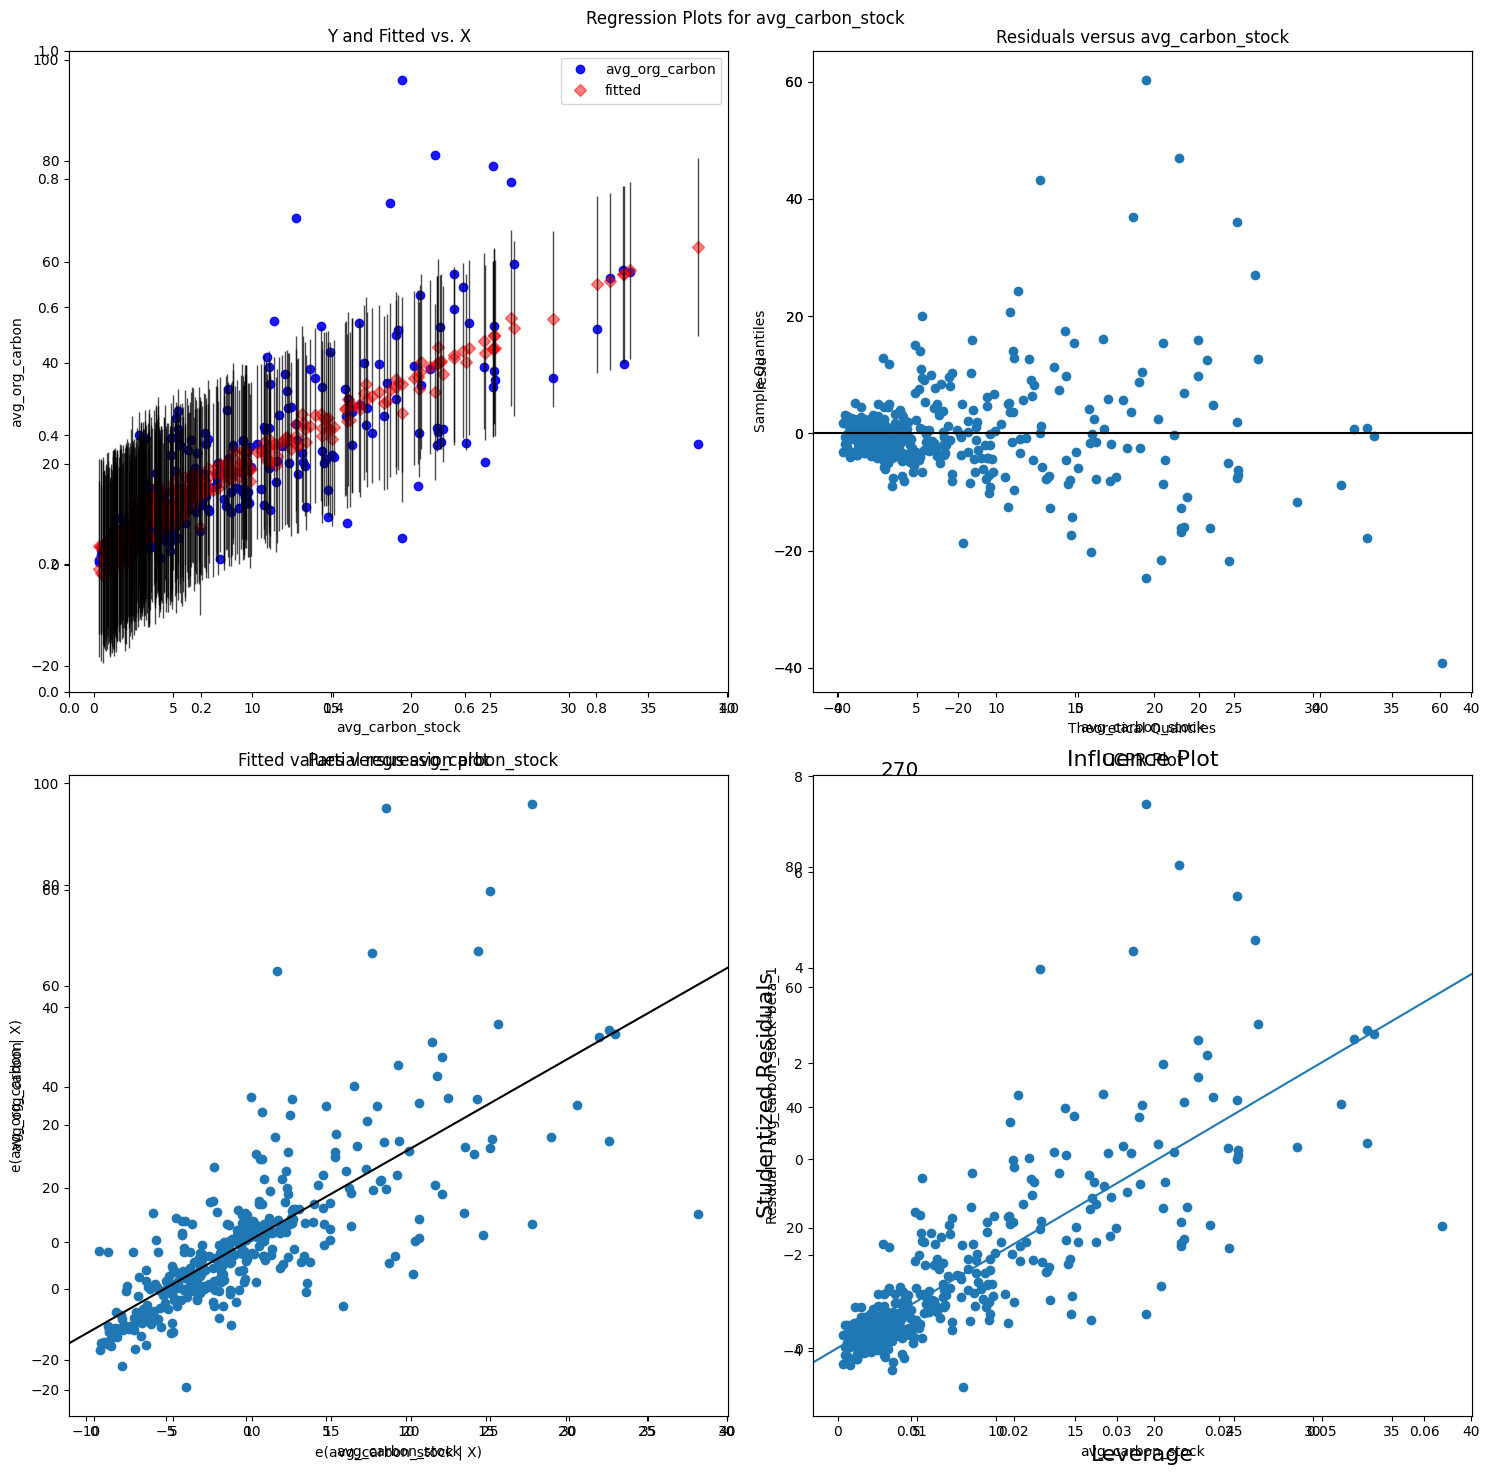

In [16]:
# Summary of data
print("Summary of Data:")
print(data.describe())

# Multiple Linear Regression
X = data[['avg_carbon_stock', 'decid_prop_canopy', 'piba_prop_canopy', 'time_after_fire']]
y = data['avg_org_carbon']

X = sm.add_constant(X) # Adding constant term to the predictor

model = sm.OLS(y, X).fit()

# Summary of linear regression model
print("\nSummary of Linear Regression Model:")
print(model.summary())

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Residuals vs Fitted
sm.graphics.plot_regress_exog(model, 'avg_carbon_stock', fig=fig)

# QQ Plot
sm.qqplot(model.resid, line='45', ax=axs[0, 1])

# Scale-Location Plot
sm.graphics.plot_fit(model, 1, ax=axs[1, 0])

# Residuals vs Leverage
sm.graphics.influence_plot(model, ax=axs[1, 1])

plt.tight_layout()
plt.show()

Removing outliers


Summary of Linear Regression Model (Excluding Rows 234, 266, and 271):
                            OLS Regression Results                            
Dep. Variable:         avg_org_carbon   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     192.9
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.47e-88
Time:                        17:48:53   Log-Likelihood:                -1322.4
No. Observations:                 369   AIC:                             2655.
Df Residuals:                     364   BIC:                             2674.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

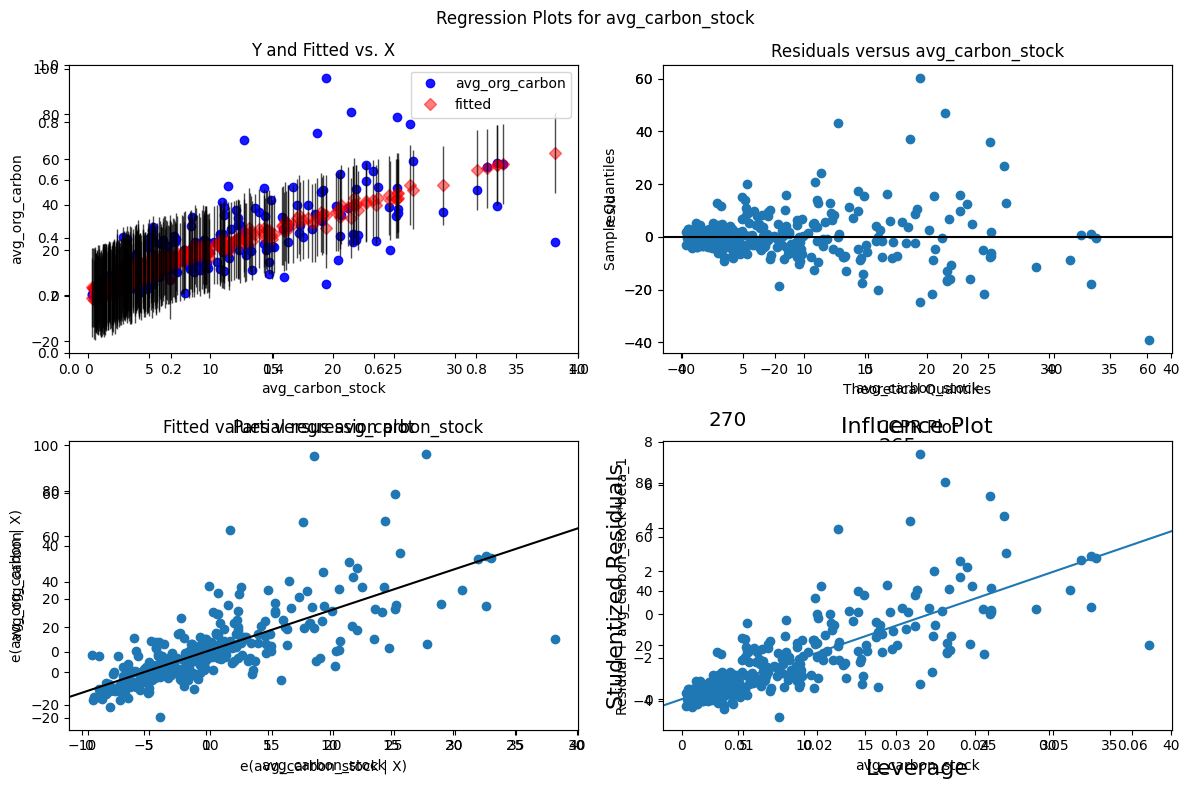

In [17]:
# Removing rows with indices 234, 266, and 271
data2 = data.drop([234, 266, 271])

# Multiple Linear Regression
X = data2[['avg_carbon_stock', 'decid_prop_canopy', 'piba_prop_canopy', 'time_after_fire']]
y = data2['avg_org_carbon']

X = sm.add_constant(X)  # Adding constant term to the predictor

model2 = sm.OLS(y, X).fit()

# Summary of linear regression model
print("\nSummary of Linear Regression Model (Excluding Rows 234, 266, and 271):")
print(model2.summary())

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Residuals vs Fitted
sm.graphics.plot_regress_exog(model2, 'avg_carbon_stock', fig=fig)

# QQ Plot
sm.qqplot(model2.resid, line='45', ax=axs[0, 1])

# Scale-Location Plot
sm.graphics.plot_fit(model2, 1, ax=axs[1, 0])

# Residuals vs Leverage
sm.graphics.influence_plot(model2, ax=axs[1, 1])

plt.tight_layout()
plt.show()

In [9]:
X = data['avg_org_carbon'].values.reshape(-1, 1)  # Reshape the input feature
y = data['avg_carbon_stock'].values

# Create and fit the model
model = LinearRegression().fit(X, y)

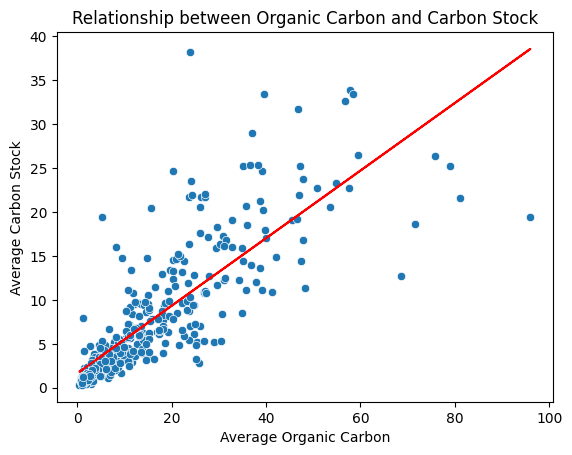

In [15]:
sns.scatterplot(x=X.flatten(), y=y)
plt.xlabel('Average Organic Carbon')
plt.ylabel('Average Carbon Stock')
plt.title('Relationship between Organic Carbon and Carbon Stock')
plt.plot(X.flatten(), model.predict(X), color='red')
plt.show()

In [20]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))
print("R:", np.sqrt(model.score(X, y)))

Coefficients: [0.38420564]
Intercept: 1.6463168562548969
R-squared: 0.656858792733177
R: 0.8104682552285296


In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming your data is loaded into a DataFrame named 'data'

# Define features and target
numerical_features = ['avg_org_carbon', 'avg_carbon_stock']
categorical_features = ['moisture', 'ecozone']
target = 'stand_dominance'

X = data[numerical_features + categorical_features]
y = data[target]

# One-hot encode categorical features
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Create decision tree regressor
max_depth = 5
clf = DecisionTreeClassifier(max_depth=max_depth)
clf.fit(X_encoded, y)

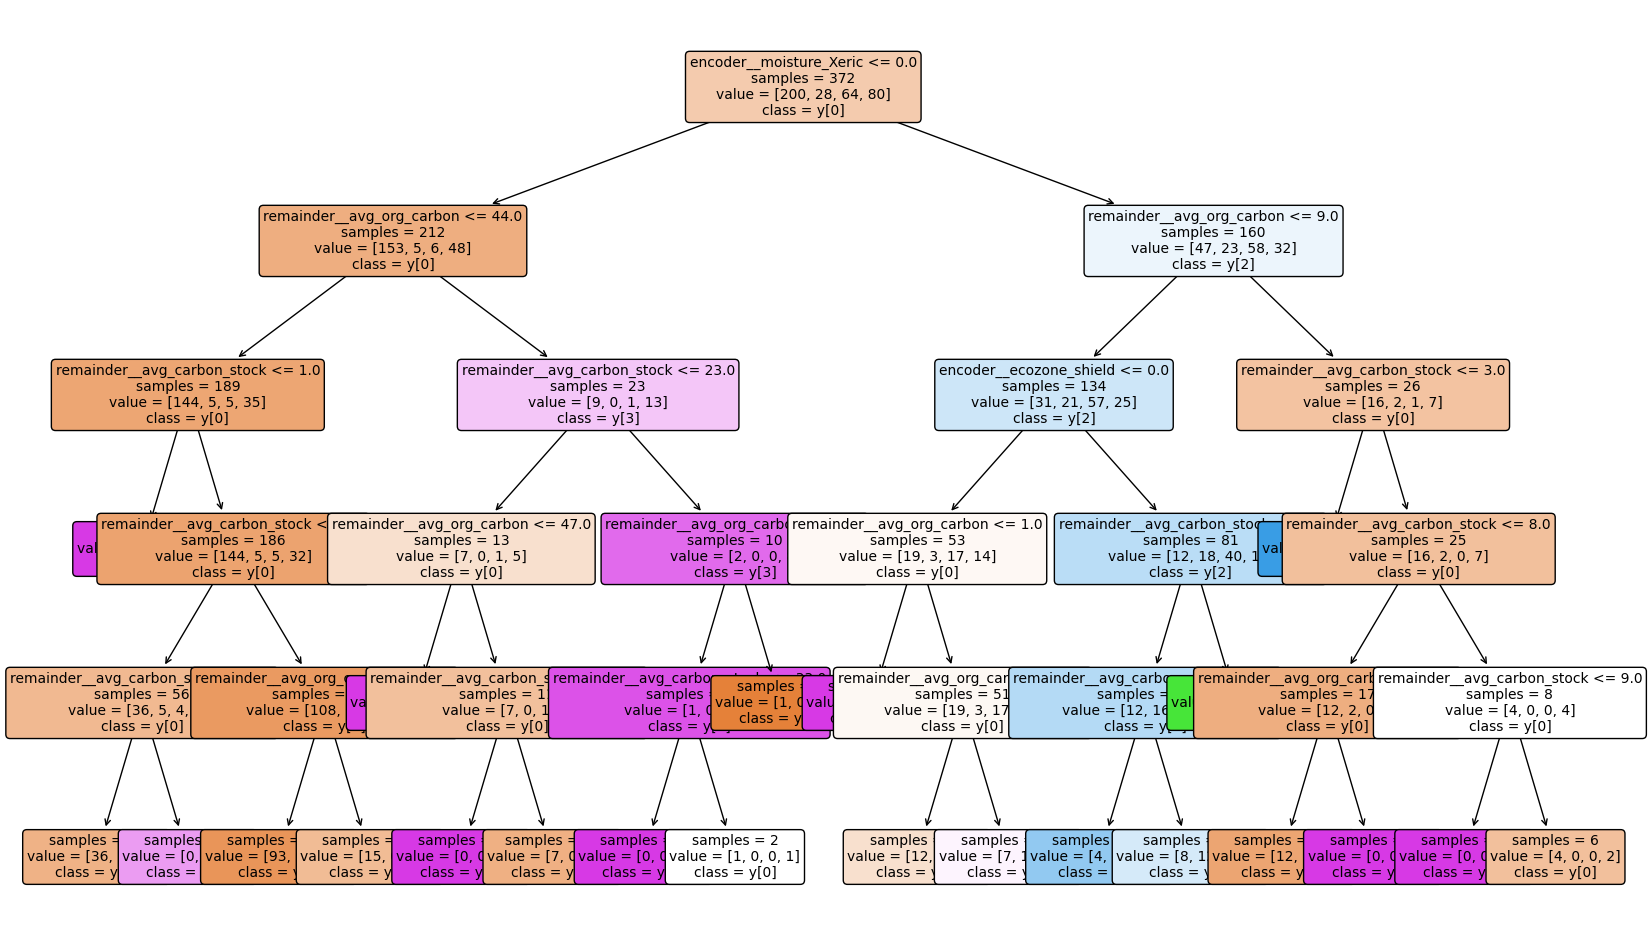

In [33]:
# Visualize decision tree
plt.figure(figsize=(20, 12))
plot_tree(clf, filled=True, feature_names=ct.get_feature_names_out(), rounded=True, fontsize=10,
          class_names=True, impurity=False, proportion=False, precision=0, node_ids=False)
plt.show()

### Clustering \ DBSCAN - Roberto Jackson Baeza

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
import random

In [33]:
csvdata = pd.read_csv('SoilOrganicCarbonRecovery_NorthwestTerritories.csv')
print(csvdata.head())

     plot burn   site        date  decid_prop_canopy  piba_prop_canopy  \
0  C1-14A   C1  C1-14  2018-06-13           0.032258          0.709677   
1  C1-17A   C1  C1-17  2018-06-10           0.000000          0.000000   
2  C1-19A   C1  C1-19  2018-06-13           0.000000          0.000000   
3  C1-19B   C1  C1-19  2018-06-13           0.000000          0.650000   
4  C1-21A   C1  C1-21  2018-06-14           0.023529          0.000000   

  stand_dominance  time_after_fire moisture nonvascular_functionalgroup  \
0       Jack Pine               83    Xeric                      Lichen   
1    Black Spruce               65    Mesic                      Lichen   
2    Black Spruce               82   Hydric                    Sphagnum   
3       Jack Pine               84    Xeric                      Lichen   
4    Black Spruce               79   Hydric                  Colonizers   

   avg_org_carbon ecozone  avg_carbon_stock   latitude  longitude   
0            4.05  shield          

In [34]:
csvdata.isnull().sum()
csvdata.dropna(inplace=True)
csvdata.reset_index(drop=True, inplace=True)

desiredColumns = ["decid_prop_canopy", "piba_prop_canopy", "time_after_fire", "moisture", "avg_org_carbon", "ecozone", "avg_carbon_stock"]
data = csvdata[desiredColumns]
#print(data.head())
data

,decid_prop_canopy,piba_prop_canopy,time_after_fire,moisture,avg_org_carbon,ecozone,avg_carbon_stock
0,0.032258,0.709677,83,Xeric,4.05,shield,2.557465
1,0.000000,0.000000,65,Mesic,10.70,shield,3.798638
2,0.000000,0.000000,82,Hydric,25.75,shield,2.870864
3,0.000000,0.650000,84,Xeric,5.10,shield,2.092274
4,0.023529,0.000000,79,Hydric,27.95,shield,12.764497
...,...,...,...,...,...,...,...
367,0.920000,0.080000,1,Xeric,1.30,plains,1.390676
368,0.375000,0.500000,1,Xeric,2.70,plains,1.300133
369,0.000000,0.070423,1,Mesic,5.85,plains,3.073747
370,0.000000,0.000000,1,Hydric,20.60,plains,11.539966


In [35]:
ecoMap = {"shield":0 , "plains": 1}
moistMap = {"Xeric":0, "Mesic":0.5, "Hydric":1}
mmNormalizedCols = ["decid_prop_canopy", "piba_prop_canopy", "time_after_fire", "avg_org_carbon", "avg_carbon_stock"]


for col in mmNormalizedCols:
  maxVal = data[col].max()
  minVal = data[col].min()
  data[col] = (data[col] - minVal) / (maxVal - minVal)

data.loc[data["ecozone"] == "shield", "ecozone"] = 0.0
data.loc[data["ecozone"] == "plains", "ecozone"] = 1.0


data.loc[data["moisture"] == "Xeric", "moisture"] = 0.0
data.loc[data["moisture"] == "Mesic", "moisture"] = 0.5
data.loc[data["moisture"] == "Hydric", "moisture"] = 1.0

print(data)

     decid_prop_canopy  piba_prop_canopy  time_after_fire moisture  \
0             0.032625          0.709677         0.828283      0.0   
1             0.000000          0.000000         0.646465      0.5   
2             0.000000          0.000000         0.818182      1.0   
3             0.000000          0.650000         0.838384      0.0   
4             0.023797          0.000000         0.787879      1.0   
..                 ...               ...              ...      ...   
367           0.930455          0.080000         0.000000      0.0   
368           0.379261          0.500000         0.000000      0.0   
369           0.000000          0.070423         0.000000      0.5   
370           0.000000          0.000000         0.000000      1.0   
371           0.233392          0.769231         0.000000      0.0   

     avg_org_carbon ecozone  avg_carbon_stock  
0          0.037677     0.0          0.059010  
1          0.107274     0.0          0.091811  
2          0.26

C:\Users\baeza\AppData\Local\Temp\ipykernel_30628\1211403850.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = (data[col] - minVal) / (maxVal - minVal)
C:\Users\baeza\AppData\Local\Temp\ipykernel_30628\1211403850.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = (data[col] - minVal) / (maxVal - minVal)


In [36]:
basicModel = DBSCAN(eps=0.5, min_samples=5)

basicModel.fit(data[desiredColumns])

clusterLabels = basicModel.labels_
dataClusters = pd.concat([data, pd.Series(clusterLabels, name='Cluster')], axis=1)

print(dataClusters.head())
print("\nSilhouette Score for Basic Model: " + str(metrics.silhouette_score(dataClusters, dataClusters['Cluster'])))


   decid_prop_canopy  piba_prop_canopy  time_after_fire moisture  \
0           0.032625          0.709677         0.828283      0.0   
1           0.000000          0.000000         0.646465      0.5   
2           0.000000          0.000000         0.818182      1.0   
3           0.000000          0.650000         0.838384      0.0   
4           0.023797          0.000000         0.787879      1.0   

   avg_org_carbon ecozone  avg_carbon_stock  Cluster  
0        0.037677     0.0          0.059010        0  
1        0.107274     0.0          0.091811        1  
2        0.264783     0.0          0.067292        2  
3        0.048666     0.0          0.046717        0  
4        0.287807     0.0          0.328750        2  

Silhouette Score for Basic Model: 0.5500387623625556


In [80]:
desiredColumns = ["decid_prop_canopy", "piba_prop_canopy", "time_after_fire", "moisture", "avg_org_carbon", "ecozone", "avg_carbon_stock"]
randomEpsilons = [random.random() for _ in range(20)]
randomMinPoints = [random.randint(3,25) for _ in range(20)]

bestR1Epsilon = 0
bestR1MinPoints = 0
BestR1SilhoutteScore = -1

for i in range(20):
    modelR1 = DBSCAN(eps=randomEpsilons[i], min_samples=randomMinPoints[i])
    modelR1.fit(data[desiredColumns])

    modelR1ClusterLabels = modelR1.labels_
    modelR1Clusters = pd.concat([data, pd.Series(modelR1ClusterLabels, name='Cluster')], axis=1)
    modelR1ClusterCount = len(set(modelR1ClusterLabels))

    if(modelR1ClusterCount > 2):
        model1Score = metrics.silhouette_score(modelR1Clusters, modelR1Clusters['Cluster'])
    else:
        model1Score = -1

    if(model1Score > BestR1SilhoutteScore):
        BestR1SilhoutteScore = model1Score
        bestR1Epsilon = randomEpsilons[i]
        bestR1MinPoints = randomMinPoints[i]


print("Best Round 1 Score: " +  str(BestR1SilhoutteScore))
print("Best Round 2 Epsilon: " + str(bestR1Epsilon))
print("Best Round 2 MinPoint: " + str(bestR1MinPoints))

Best Score: 0.6462038637177934
Best Epsilon: 0.3022386542724167
Best MinPoint: 9


In [81]:
desiredColumns = ["decid_prop_canopy", "piba_prop_canopy", "time_after_fire", "moisture", "avg_org_carbon", "ecozone", "avg_carbon_stock"]
randomEpsilons = [random.uniform(bestR1Epsilon * 0.5, bestR1Epsilon * 1.5) for _ in range(20)]
randomMinPoints = [random.randint(int(bestR1MinPoints*.5),int(bestR1MinPoints*1.5)) for _ in range(20)]

bestR2Epsilon = bestR1Epsilon
bestR2MinPoints = bestR1MinPoints
BestR2SilhoutteScore = BestR1SilhoutteScore

for i in range(20):
    modelR2 = DBSCAN(eps=randomEpsilons[i], min_samples=randomMinPoints[i])
    modelR2.fit(data[desiredColumns])

    modelR2ClusterLabels = modelR2.labels_
    modelR2Clusters = pd.concat([data, pd.Series(modelR2ClusterLabels, name='Cluster')], axis=1)
    modelR2ClusterCount = len(set(modelR2ClusterLabels))


    if(modelR2ClusterCount > 2):
        modelR2Score = metrics.silhouette_score(modelR2Clusters, modelR2Clusters['Cluster'])
    else:
        modelR2Score = -1

    if(modelR2Score > BestR2SilhoutteScore):
        BestR2SilhoutteScore = modelR2Score
        bestR2Epsilon = randomEpsilons[i]
        bestR2MinPoints = randomMinPoints[i]


print("Best Round 2 Score: " +  str(BestR2SilhoutteScore))
print("Best Round 2 Epsilon: " + str(bestR2Epsilon))
print("Best Round 2 MinPoint: " + str(bestR2MinPoints))

Best Round 2 Score: 0.6708834418343176
Best Round 2 Epsilon: 0.25552877375526106
Best Round 2 MinPoint: 7


In [84]:
desiredColumns = ["decid_prop_canopy", "piba_prop_canopy", "time_after_fire", "moisture", "avg_org_carbon", "ecozone", "avg_carbon_stock"]
randomEpsilons = [random.uniform(bestR2Epsilon * 0.75, bestR2Epsilon * 1.2) for _ in range(20)]
randomMinPoints = [random.randint(int(bestR2MinPoints*.75),int(bestR2MinPoints*1.25)) for _ in range(20)]

bestR3Epsilon = bestR2Epsilon
bestR3MinPoints = bestR2MinPoints
BestR3SilhoutteScore = BestR2SilhoutteScore

for i in range(20):
    modelR3 = DBSCAN(eps=randomEpsilons[i], min_samples=randomMinPoints[i])
    modelR3.fit(data[desiredColumns])

    modelR3ClusterLabels = modelR3.labels_
    modelR3Clusters = pd.concat([data, pd.Series(modelR3ClusterLabels, name='Cluster')], axis=1)
    modelR3ClusterCount = len(set(modelR3ClusterLabels))


    if(modelR3ClusterCount > 2):
        modelR3Score = metrics.silhouette_score(modelR3Clusters, modelR3Clusters['Cluster'])
    else:
        modelR3Score = -1

    if(modelR3Score > BestR3SilhoutteScore):
        BestR3SilhoutteScore = modelR3Score
        bestR3Epsilon = randomEpsilons[i]
        bestR3MinPoints = randomMinPoints[i]


print("Best Round 3 Score: " +  str(BestR3SilhoutteScore))
print("Best Round 3 Epsilon: " + str(bestR3Epsilon))
print("Best Round 3 MinPoint: " + str(bestR3MinPoints))

Best Round 3 Score: 0.6829038115260956
Best Round 3 Epsilon: 0.2385849607088677
Best Round 3 MinPoint: 5


In [19]:
def plotData3D(dataset, x, y, z):
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(dataset[x], dataset[y], dataset[z], c=dataset['Cluster'], cmap='viridis')

  ax.set_xlabel(x)
  ax.set_ylabel(y)
  ax.set_zlabel(z)
  ax.set_title(x + " vs " + y + " vs " + z)

  plt.show()

### DO NOT RUN UNLESS YOU WANT A MILLION GRAPHS

In [ ]:
desiredColumns = ["decid_prop_canopy", "piba_prop_canopy", "time_after_fire", "moisture", "avg_org_carbon", "ecozone", "avg_carbon_stock"]
combinations_3_elements = list(combinations(desiredColumns, 3))

for combo in combinations_3_elements:
  plotData3D(dataClusters, combo[0], combo[1], combo[2])